In [15]:
import numpy as np
from numpy.linalg import inv

from PIL import Image

from skimage.transform import warp
from skimage import transform

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import ginput
from matplotlib.backend_bases import MouseButton

In [16]:
img = np.asarray(Image.open('newyork3.jpg'))

In [17]:
pts_src = np.array([[1959, 1050],
                    [2657, 913],
                    [2693, 1769],
                    [1951, 1800]])

# Use The below line to choose custom points by removing the '#'
# When picking custom points pick in following oredr
#    Top left
#    Top Right
#    Bottom Right
#    Bottom Left

#plt.imshow(img)
#pts_src = plt.ginput(4, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)


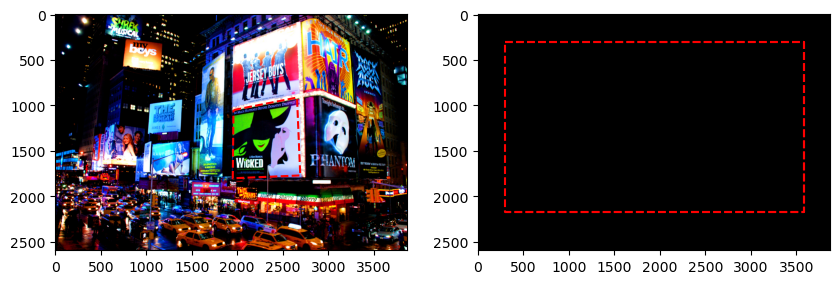

In [18]:
%matplotlib inline
pts_src = np.round_(pts_src)

length = ((max(pts_src[:,0]) - min(pts_src[:,0])) * 2) +1800
width = ((max(pts_src[:,1]) - min(pts_src[:,1])) * 2) +100

x_st = 300
y_st = 300

pts_dst = np.array([[x_st,x_st],
                    [length+x_st,y_st],
                    [length+x_st,width+y_st],
                    [x_st,width+y_st]])


fig, ax = plt.subplots(1,2,figsize=(10,5))
    
projection = np.zeros_like(img)
ax[0].imshow(img)
ax[0].plot(np.append(pts_src[:, 0], pts_src[0, 0]), np.append(pts_src[:, 1], pts_src[0, 1]), 'r--')
ax[1].imshow(projection)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
ax[1].plot(np.append(pts_dst[:, 0], pts_dst[0, 0]), np.append(pts_dst[:, 1], pts_dst[0, 1]), 'r--')
plt.show()


In [19]:
def find_H(pts_src, pts_dst):
    A = find_A(pts_src, pts_dst)
    U,sigma,V = np.linalg.svd(A)
    homography = V.T[:,len(V[0])-1].reshape(3,3)
    return homography
    
def find_A(pts_src, pts_dst):
    num_points = pts_src.shape[0]

    A = []
    
    for i in range(num_points):
        rowOfPairPoints = find_rowOfPairPoints(pts_src[i], pts_dst[i])
        A.append(rowOfPairPoints)
    return np.concatenate(A, axis=0)

def find_rowOfPairPoints(pts_src, pts_dst):
    x, y = pts_src[0], pts_src[1]
    x_t, y_t = pts_dst[0], pts_dst[1]

    A_partial = np.array([
        [-x,-y,-1,0,0,0,x_t*x,x_t*y,x_t],
        [0,0,0,-x,-y,-1,y_t*x,y_t*y,y_t]
    ])
    return A_partial

In [20]:
H = find_H(pts_src,pts_dst)

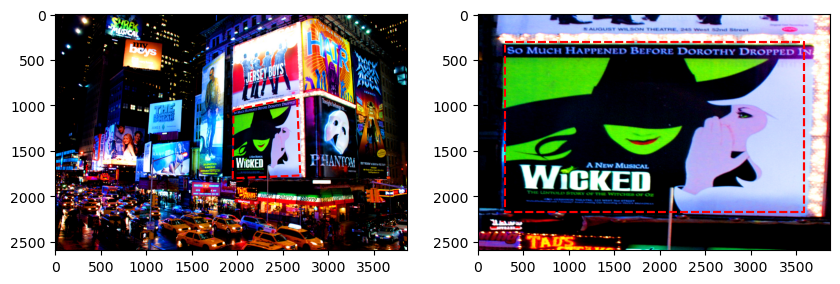

In [21]:
%matplotlib inline
# The below was to check my results 
#tform = transform.estimate_transform('projective', np.array(pts_src),np.array(pts_dst))

transformed = warp(img,inv(H))

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img)
ax[0].plot(np.append(pts_src[:, 0], pts_src[0, 0]),np.append(pts_src[:, 1], pts_src[0, 1]), 'r--')
ax[1].imshow(transformed)
ax[1].plot(pts_dst[:, 0], pts_dst[:, 1], 'r--')
ax[1].plot(np.append(pts_dst[:, 0], pts_dst[0, 0]),np.append(pts_dst[:, 1], pts_dst[0, 1]), 'r--')
plt.show()

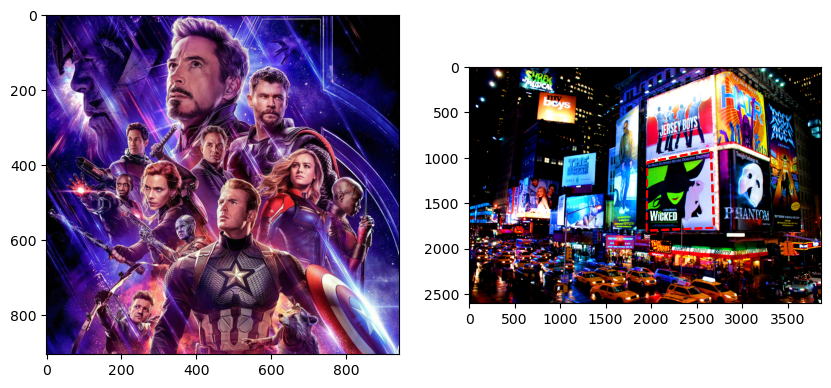

In [22]:
img_av = np.asarray(Image.open('avengers.jpg'))

pts_dst1 = pts_src
pts_src1 = np.array([[],
                     [],
                     [],
                     []])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_av)
ax[1].imshow(img)
ax[1].plot(pts_dst1[:, 0], pts_dst1[:, 1], 'r--')
ax[1].plot(np.append(pts_dst1[:, 0], pts_dst1[0, 0]), np.append(pts_dst1[:, 1], pts_dst1[0, 1]), 'r--')
plt.show()
